### Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
from pylab import *
%matplotlib inline

### Read the data frame from pickle file

In [2]:
import pickle
Data=pickle.load(open('Weather/SampleStations.pickle','r'))

In [3]:
FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)

In [4]:
frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

### Script for plotting yearly plots 

In [5]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot annual variation in maximum temperature for 5 sample stations

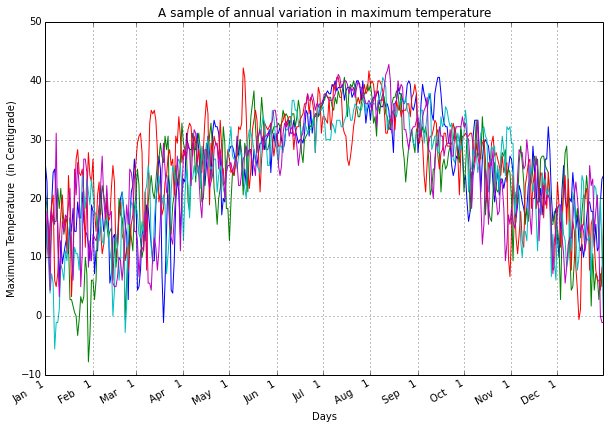

In [6]:
tmax_df=df[df['measurement']=='TMAX']
YearlyPlots((tmax_df[1:6].ix[:,3:368]/10).transpose(),ttl='A sample of annual variation in maximum temperature',\
            yl='Maximum Temperature  (in Centigrade)',xl='Days')

### Plot annual variation in minimum temperature for 5 sample stations

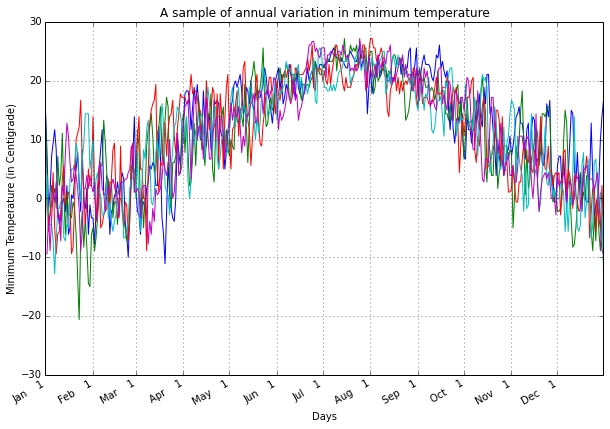

In [7]:
tmin_df=df[df['measurement']=='TMIN']
YearlyPlots((tmin_df[1:6].ix[:,3:368]/10).transpose(),ttl='A sample of annual variation in minimum temperature',\
            yl='Minimum Temperature (in Centigrade)',xl='Days')

### Plot annual variation in observed temperature for 5 sample stations

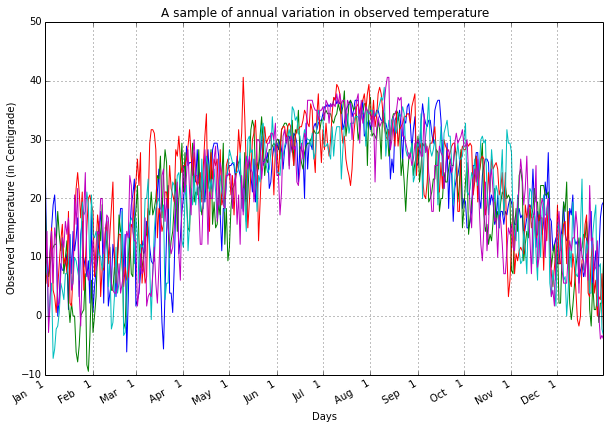

In [8]:
tobs_df=df[df['measurement']=='TOBS']
YearlyPlots((tobs_df[1:6].ix[:,3:368]/10).transpose(),ttl='A sample of annual variation in observed temperature',\
            yl='Observed Temperature (in Centigrade)',xl='Days')

### Plot annual variation in snowfall for 5 sample stations

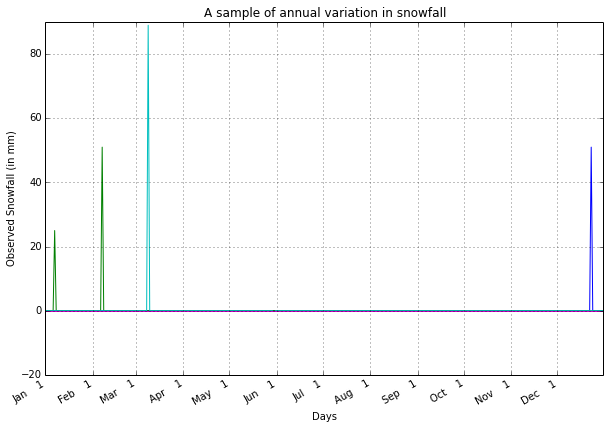

In [9]:
snow_df=df[df['measurement']=='SNOW']
YearlyPlots(snow_df[12:17].ix[:,3:368].transpose(),ttl='A sample of annual variation in snowfall',\
            yl='Observed Snowfall (in mm)',xl='Days',y=[-20,90])

### Plot annual variation in snow depth for 5 sample stations

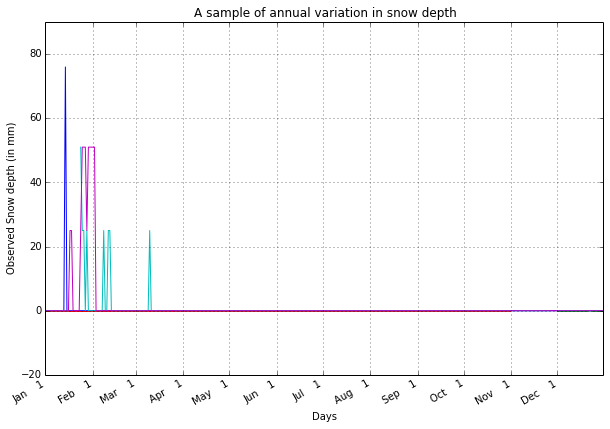

In [10]:
snwd_df=df[df['measurement']=='SNWD']
YearlyPlots(snwd_df[12:17].ix[:,3:368].transpose(),ttl='A sample of annual variation in snow depth',\
            yl='Observed Snow depth (in mm)',xl='Days',y=[-20,90])

### Plot annual variation in precipitation for 5 sample stations

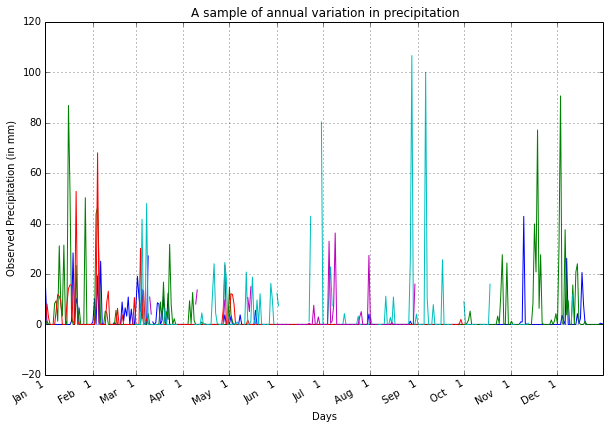

In [11]:
prcp_df=df[df['measurement']=='PRCP']
YearlyPlots((prcp_df[1:6].ix[:,3:368]/10).transpose(),ttl='A sample of annual variation in precipitation',\
            yl='Observed Precipitation (in mm)',xl='Days',y=[-20,120])